## D208 Predictive Modeling PA
##### Submitted By Edwin Perry
### Table of Contents
<ol>
    <li><a href="#A">Research Question</a></li>
    <li><a href="#B">Describing Dataset</a></li>
    <li><a href="#C">Univariate Analysis</a></li>
    <li><a href="#D">Bivariate Analysis</a></li>
    <li><a href="#E">Summary</a></li>
    <li><a href="#F">Web Sources</a></li>
    <li><a href="#G">Sources</a></li>
</ol>

<a id="A"></a>
#### A: Research Question
##### 1. Providing the question
The research question I elected to examine is as follows: "What factors are most closely associated with a long tenure as a customer?" Though this question is quite broad, this knowledge is essential. It will inform the business's decision making with regards to customer outreach and customer treatment to attain and retain long-term customers. The potential implications are vital to the business, as the company could reduce the necessity of acquiring new customers, reducing expenditures and increasing profits


##### 2. Goals of Analysis
The foals for this analysis is to use a multiple regression model to determine which factors in the telecommunications dataset (independent/explanatory variables) will result in the longest tenures (the dependent/target variable). If the analysis can identify these factors, customers can be retained over longer periods of time, thus reducing the necessity of acquiring new customers or allowing for a higher number of concurrent customers, resulting in higher profitability for the business. Just as critically, this analysis will reveal those factors that are independent or only loosely correlated with long tenures, telling the business what actions are not necessary to perform should it wish to retain customers for a long tenure.

<a id="B"></a>
#### B: Method Justification:
##### 1: Assumptions of a Multiple Linear Regression Model
There are multiple assumptions made when one uses a multiple linear regression model for data analysis. 
<ol>
    <li>The first of these assumptions is that every variable included within the analysis is independent of each other. Otherwise, we get a phenomenon referred to as multicolinearity. This phenomenon descreases the reliability of the model, as the phenomenon that were assumed to be independent are instead interacting with each other.</li>
    <li>Another assumption to be made would be that linear relationships exist between all independent variables and the dependent variable. If any independent variable were not to have a relationship with the dependent variable, it would be useless to include it in the analysis.</li>
    <li>Furthermore, multiple linear regression models assume that the model's residuals have a normal distribution.</li>
</ol>

##### 2: Benefits of Python

The programming language I will be using for this analysis will be Python. There are a number of benefits to using Python for this analysis:
<ol>
    <li>Python's simple, easy to understand syntax will make the steps of this analysis easy to develop and understand</li>
    <li>Python has a number of libraries designed specifically for this type of data analysis, such as sklearn, Pandas, NumPy, and SciPy</li>
    <li>Python's Jupyter Notebooks makes displaying the data, separated out into sections with explanations, incredibly easy</li>    
</ol>
For these reasons, I have decided that Python would be an ideal tool for this data analysis

##### 3: Explanation/Justification of Multiple Linear Regression as a Technique

Multiple linear regression is used for the purpose of modelling relationships within a dataset. Specifically, it is used to identify the relationship of one continuous variable (the dependent/target variable) and a number of independent variables (otherwise known as explanatory variables), which can be categorical or continuous. As it can be used to correlate multiple distinct variables against a dependent variable, the use of a multiple linear regression model is perfectly suited to answer my research question. The dependent variable in this circumstance would be the tenure of customers, a continuous value, that can be explained by a number of independent variables in the dataset. Correlating all the different independent variables against one singular dependent variable (length of tenure) is what multiple linear regression is designed for, and as such, is perfect for answering my research question.

<a id="C"></a>
#### C: Data Preparation
##### 1: Goals and Steps

There are a number of issues within the existing dataset. One such existing issue is that zip code is stored as a float, rather than a string. This leads to the loss of leading zeroes in the data. Furthermore, many entries are stored as string data types when they have binary values. This leads to a reduction in efficiency and the utilization of more time/resources in analyzing, when they could be stored as booleans. Finally, outliers exist within the dataset, which may mislead when engaging in data analysis. The steps of the data preperation/cleaning will be as follows
<ol>
    <li>Remove columns unnecessary to answering the research question</li>
    <li>Convert columns that can be to booleans</li>
    <li>Remove any duplicated customer ID's in the dataset, to ensure no customer is double counted</li>
    <li>Remove any entries without an entry in a column that is categorical</li>
    <li>For any entry missing values in a quantitative column, replace the missing value with the median value of the column</li>
    <li>Filter out any entries that have a z-score in a quantitative column more than 3 or less than -3</li>
</ol>

The goal of this data cleaning would be to have a dataset with no outliers in any quantitative fields, no null values in any fields, no unnecessary columns, and all data being formatted correctly and in the most efficient manner

##### 2: Dependent and Independent Variables

All of the variables are summarized and explained below:

<b>Children</b>

The number of children the customer has, stored as an integer. This will be useful in determining whether those with larger sized families are likely to remain as long-term customers.


In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import plotnine as p9
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing


In [2]:
data = pd.read_csv("/home/edwinp/Downloads/d9rkejv84kd9rk30fi2l/churn_clean.csv")
pd.set_option("display.max_columns", None)

In [3]:
data.Children.value_counts().sort_index()

Children
0     2570
1     2472
2     1495
3     1472
4     1006
5      212
6      187
7      185
8      210
9       92
10      99
Name: count, dtype: int64

<b>Income</b>

The annual income of the customer, as reported at sign up. Stored as a float data type. Used as an independent variable to determine whether income is correlated with tenure

In [4]:
data.Income.describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: Income, dtype: float64

<b>Area</b>

The residential area type that the customer lives in. Can be classified as rural, urban, or suburban. Stored as a string data type. Used as an independent variable to determine whether area is associated with tenure

In [5]:
data.Area.value_counts().sort_index()

Area
Rural       3327
Suburban    3346
Urban       3327
Name: count, dtype: int64

<b>Age</b>

The age of the customer as reported at sign up. Stored as an integer. Used as an independent vairable to determine whether age may be associated with tenure

In [6]:
data.Age.describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: Age, dtype: float64

<b>Outage</b>

The number of seconds each week a person experiences an outage on average. Stored as a float. This will used as an independent variable to determine whether outages are associated with tenure

In [7]:
data.Outage_sec_perweek.describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: Outage_sec_perweek, dtype: float64

<b>Contract</b>

The contract term of the customer, with the options being Month-to-month, One year, and Two year. Stored as a string. This will be used to determine whether contract duration may influence tenure

In [8]:
data.Contract.value_counts().sort_index()

Contract
Month-to-month    5456
One year          2102
Two Year          2442
Name: count, dtype: int64

<b>Monthly Charge</b>

The amount, in dollars, that the customer is charged each month. Stored as a float data type. This is an independent variable that may contribute to the customer tenure

In [9]:
data.MonthlyCharge.describe()

count    10000.000000
mean       172.624816
std         42.943094
min         79.978860
25%        139.979239
50%        167.484700
75%        200.734725
max        290.160419
Name: MonthlyCharge, dtype: float64

<b>Marital</b>

Marital status of the customer, as reported at sign-up. Stored as a string data type, with 5 possible values: Divorced, Married, Never Married, Separated, and Widowed. Used as an independent variable to determine if marital status is associated with tenure

In [10]:
data.Marital.value_counts().sort_index()

Marital
Divorced         2092
Married          1911
Never Married    1956
Separated        2014
Widowed          2027
Name: count, dtype: int64

<b>Gender</b>

The gender of the customer, as reported at sign-up. Stored as a string containing 3 possible values: Female, Male, and Nonbinary. Used as an independent variable to determine if gender may influence the tenure of the customer.

In [11]:
data.Gender.value_counts().sort_index()

Gender
Female       5025
Male         4744
Nonbinary     231
Name: count, dtype: int64

<b>Techie</b>

Whether or not the customer describes themselves as technically inclined, reported at sign-up. Can have two possible values: Yes and No. Currently stored as a string, but will be converted to boolean. An independent varibale to determine whether technological inclination is associated with tenure

In [12]:
data.Techie.value_counts().sort_index()

Techie
No     8321
Yes    1679
Name: count, dtype: int64

<b>Tenure</b>

The number of months the customer has stayed with the provider. Stored as a float. Used as the dependent variable being observed

In [13]:
data.Tenure.describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: Tenure, dtype: float64

In [14]:
data.Bandwidth_GB_Year.describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: Bandwidth_GB_Year, dtype: float64

In [15]:
data.PaymentMethod.value_counts()

PaymentMethod
Electronic Check            3398
Mailed Check                2290
Bank Transfer(automatic)    2229
Credit Card (automatic)     2083
Name: count, dtype: int64

In [16]:
data['Income'].fillna(data['Income'].median(), inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)
data["MonthlyCharge"].fillna(data["MonthlyCharge"].median(), inplace=True)
data["Outage_sec_perweek"].fillna(data["Outage_sec_perweek"].median(), inplace=True)
data["Age"].fillna(data["Age"].median(), inplace=True)
data["Children"].fillna(data["Children"].median(), inplace=True)
data.dropna(how='any',inplace=True)
data.drop_duplicates(subset=['Customer_id'])
zscores = stats.zscore(data['Income'])
data['IncomeZScore'] = zscores
zscores = stats.zscore(data['Tenure'])
data['TenureZScore'] = zscores
zscores = stats.zscore(data['MonthlyCharge'])
data['MonthlyChargeZScore'] = zscores
zscores = stats.zscore(data['Outage_sec_perweek'])
data['Outage_sec_perweekZScore'] = zscores
zscores = stats.zscore(data['Age'])
data['AgeZScore'] = zscores
zscores = stats.zscore(data['Children'])
data['ChildrenZScore'] = zscores
data = data.query("(IncomeZScore < 3 & IncomeZScore > -3) & (TenureZScore < 3 & TenureZScore > -3) & (MonthlyChargeZScore < 3 & MonthlyChargeZScore > -3) & (Outage_sec_perweekZScore < 3 & Outage_sec_perweekZScore > -3) & (AgeZScore < 3 & AgeZScore > -3) & (ChildrenZScore < 3 & ChildrenZScore > -3)")

data = data.drop(["IncomeZScore", 'TenureZScore', 'MonthlyChargeZScore', 'Outage_sec_perweekZScore', 'AgeZScore', 'ChildrenZScore', 'CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'TimeZone', 'Job', 'Churn', 'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Email', 'Contacts', 'Yearly_equip_failure', 'Population', 'PaperlessBilling', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                7584 non-null   object 
 1   Children            7584 non-null   int64  
 2   Age                 7584 non-null   int64  
 3   Income              7584 non-null   float64
 4   Marital             7584 non-null   object 
 5   Gender              7584 non-null   object 
 6   Outage_sec_perweek  7584 non-null   float64
 7   Techie              7584 non-null   object 
 8   Contract            7584 non-null   object 
 9   PaymentMethod       7584 non-null   object 
 10  Tenure              7584 non-null   float64
 11  MonthlyCharge       7584 non-null   float64
 12  Bandwidth_GB_Year   7584 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 829.5+ KB


In [17]:
display(data.head())

,Area,Children,Age,Income,Marital,Gender,Outage_sec_perweek,Techie,Contract,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,Urban,0,68,28561.99,Widowed,Male,7.978323,No,One year,Credit Card (automatic),6.795513,172.455519,904.536110
1,Urban,1,27,21704.77,Married,Female,11.699080,Yes,Month-to-month,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,Urban,4,50,9609.57,Widowed,Female,10.752800,Yes,Two Year,Credit Card (automatic),15.754144,159.947583,2054.706961
3,Suburban,1,48,18925.23,Married,Male,14.913540,Yes,Two Year,Mailed Check,17.087227,119.956840,2164.579412
4,Suburban,0,83,40074.19,Separated,Male,8.147417,No,Month-to-month,Mailed Check,1.670972,149.948316,271.493436


##### 3: Univariate and Bivariate Statistics

Text(0, 0.5, 'Number of Customers')

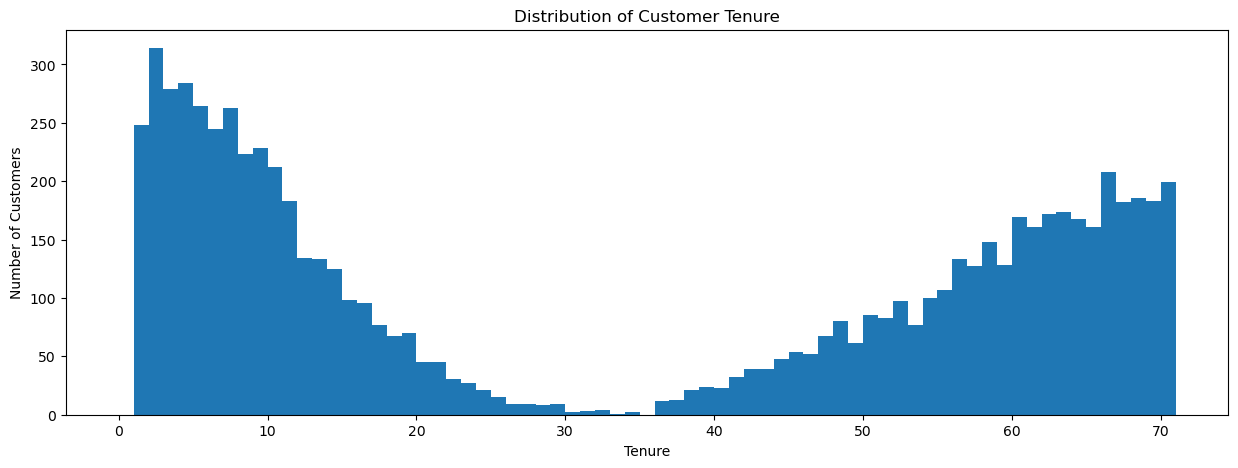

In [18]:
plt.figure(figsize= [15,5])
plt.title("Distribution of Customer Tenure")
bins = np.arange(0,72,1)
plt.hist(data=data, x="Tenure", bins=bins)
plt.xlabel("Tenure")
plt.ylabel("Number of Customers")

Text(0, 0.5, 'Tenure')

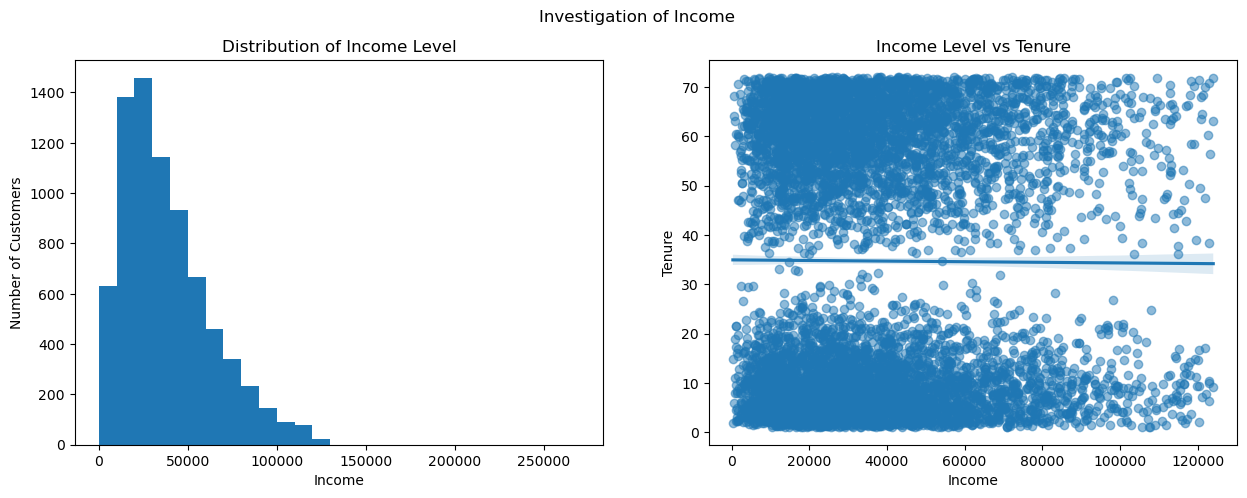

In [19]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Income")
plt.subplot(1,2,1)
plt.title("Distribution of Income Level")
bins = np.arange(0,275000,10000)
plt.hist(data=data, x="Income", bins=bins)
plt.xlabel("Income")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Income Level vs Tenure")
sns.regplot(data=data, x="Income", y="Tenure", scatter_kws={"alpha": 0.5})
plt.xlabel("Income")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

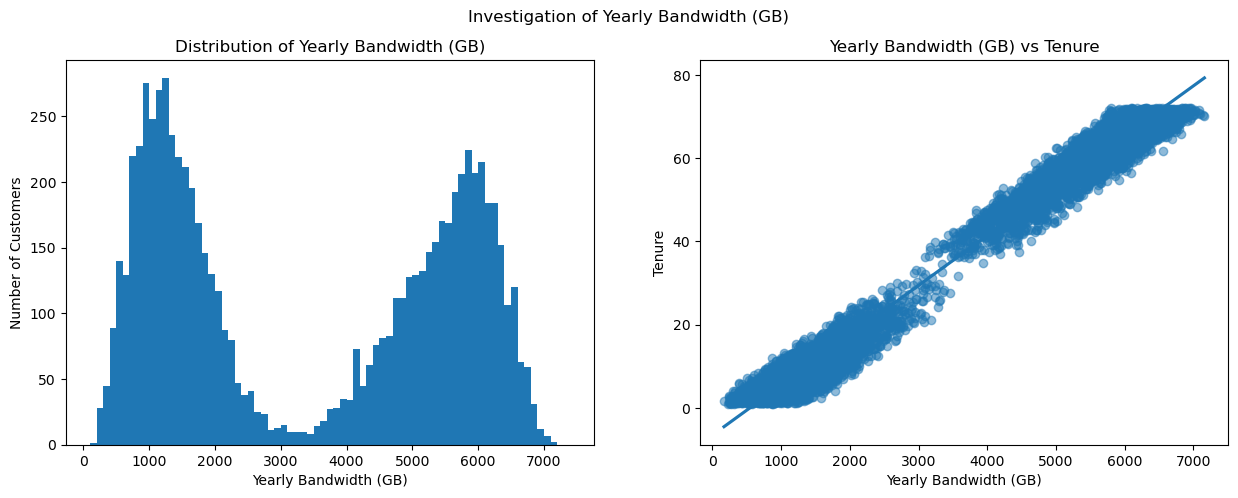

In [20]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Yearly Bandwidth (GB)")
plt.subplot(1,2,1)
plt.title("Distribution of Yearly Bandwidth (GB)")
bins = np.arange(100,7500,100)
plt.hist(data=data, x="Bandwidth_GB_Year", bins=bins)
plt.xlabel("Yearly Bandwidth (GB)")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Yearly Bandwidth (GB) vs Tenure")
sns.regplot(data=data, x="Bandwidth_GB_Year", y="Tenure", scatter_kws={"alpha": 0.5})
plt.xlabel("Yearly Bandwidth (GB)")
plt.ylabel("Tenure")

Text(0, 0.5, 'Tenure')

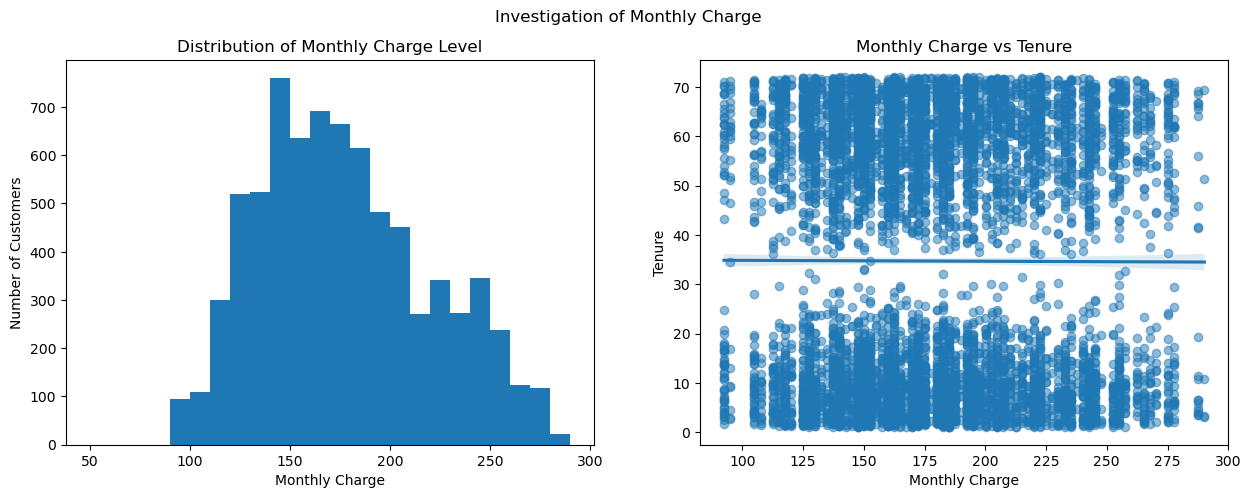

In [21]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Monthly Charge")
plt.subplot(1,2,1)
plt.title("Distribution of Monthly Charge Level")
bins = np.arange(50,300,10)
plt.hist(data=data, x="MonthlyCharge", bins=bins)
plt.xlabel("Monthly Charge")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Monthly Charge vs Tenure")
sns.regplot(data=data, x="MonthlyCharge", y="Tenure", scatter_kws={"alpha": 0.5})
plt.xlabel("Monthly Charge")
plt.ylabel("Tenure")

<Axes: title={'center': 'Age vs Tenure'}, xlabel='Age', ylabel='Tenure'>

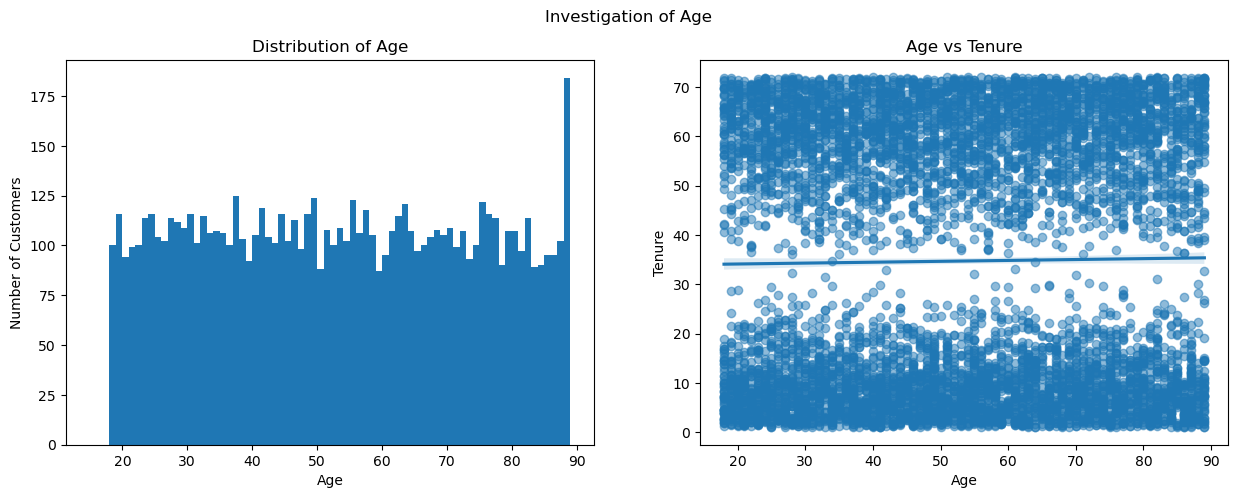

In [22]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Age")
plt.subplot(1,2,1)
plt.title("Distribution of Age")
bins = np.arange(15,90,1)
plt.hist(data=data, x="Age", bins=bins)
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Age vs Tenure")
sns.regplot(data=data, x="Age", y="Tenure", scatter_kws={"alpha": 0.5})

<Axes: title={'center': 'Outage Seconds Per Week vs Tenure'}, xlabel='Outage_sec_perweek', ylabel='Tenure'>

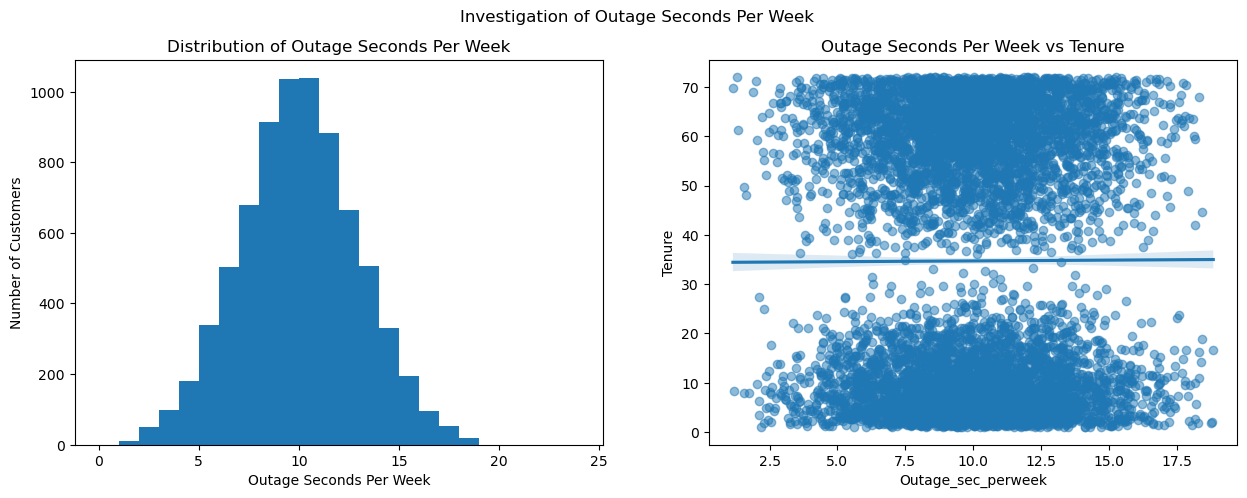

In [23]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Outage Seconds Per Week")
plt.subplot(1,2,1)
plt.title("Distribution of Outage Seconds Per Week")
bins = np.arange(0,25,1)
plt.hist(data=data, x="Outage_sec_perweek", bins=bins)
plt.xlabel("Outage Seconds Per Week")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Outage Seconds Per Week vs Tenure")
sns.regplot(data=data, x="Outage_sec_perweek", y="Tenure", scatter_kws={"alpha": 0.5})

<Axes: title={'center': 'Children vs Tenure'}, xlabel='Children', ylabel='Tenure'>

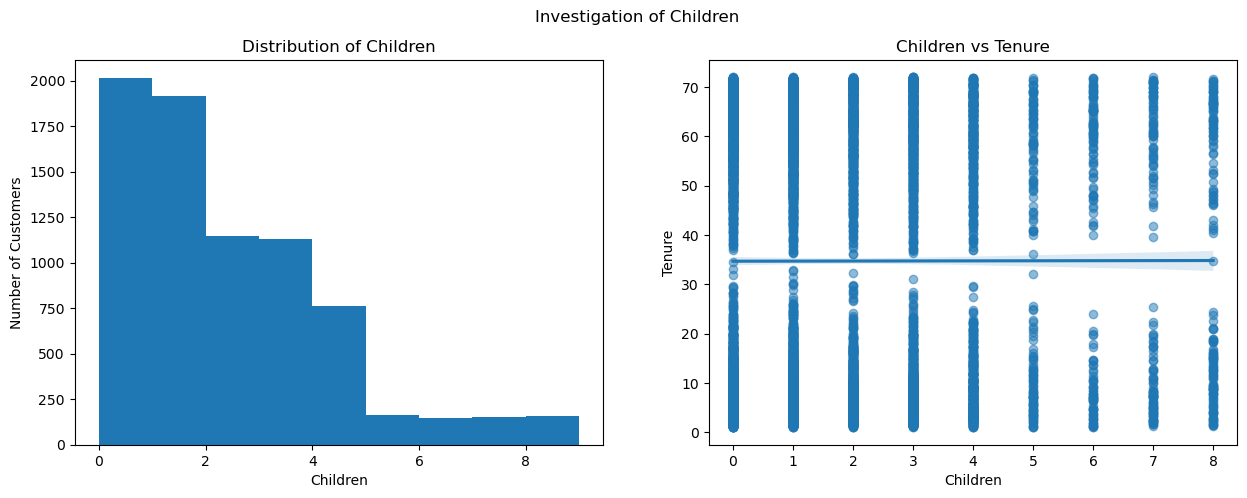

In [24]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation of Children")
plt.subplot(1,2,1)
plt.title("Distribution of Children")
bins = np.arange(0,10,1)
plt.hist(data=data, x="Children", bins=bins)
plt.xlabel("Children")
plt.ylabel("Number of Customers")
plt.subplot(1,2,2)
plt.title("Children vs Tenure")
sns.regplot(data=data, x="Children", y="Tenure", scatter_kws={"alpha": 0.5})

/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0, 0.5, 'Tenure')

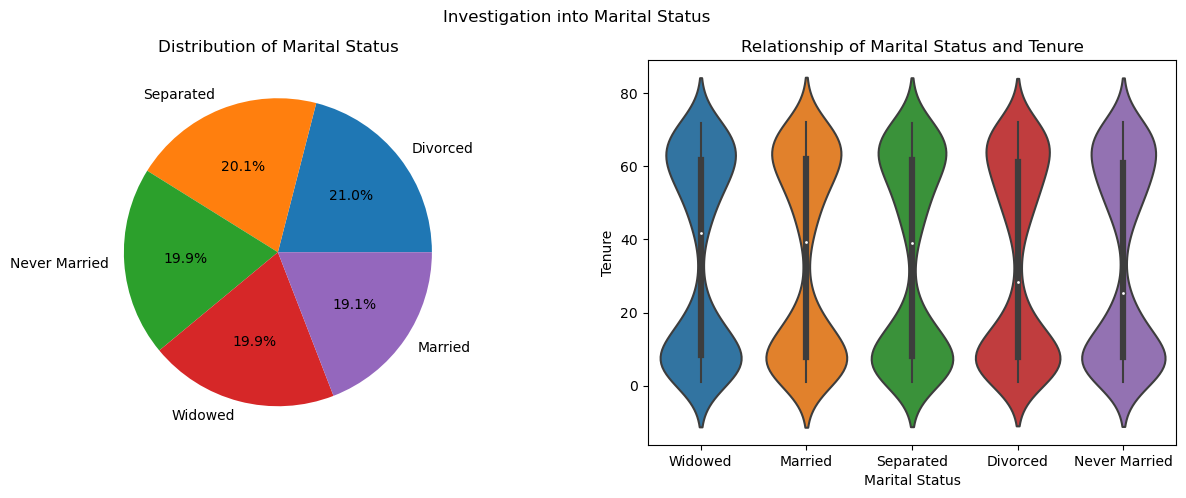

In [25]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Marital Status")
plt.subplot(1,2,1)
plt.title("Distribution of Marital Status")
marital_status = data["Marital"].value_counts()
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Marital Status and Tenure")
sns.violinplot(data = data, x="Marital", y="Tenure",)
plt.xlabel("Marital Status")
plt.ylabel("Tenure")

/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0, 0.5, 'Tenure')

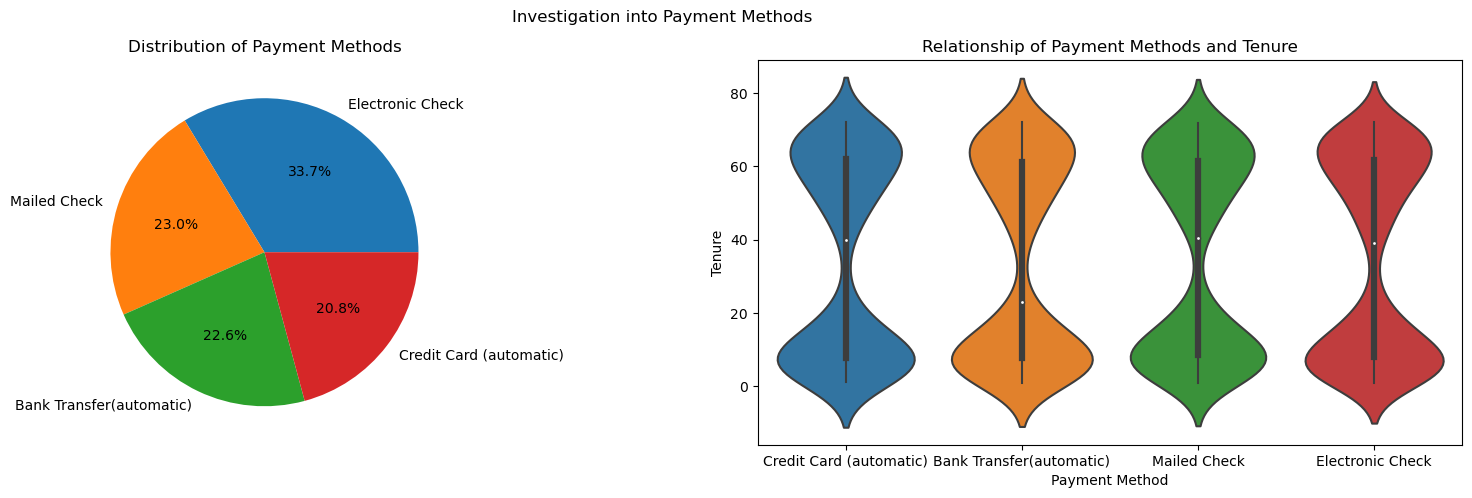

In [26]:
plt.figure(figsize=[20,5])
plt.suptitle("Investigation into Payment Methods")
plt.subplot(1,2,1)
plt.title("Distribution of Payment Methods")
payment_method = data["PaymentMethod"].value_counts()
plt.pie(payment_method, labels=payment_method.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Payment Methods and Tenure")
sns.violinplot(data = data, x="PaymentMethod", y="Tenure",)
plt.xlabel("Payment Method")
plt.ylabel("Tenure")

/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0, 0.5, 'Tenure')

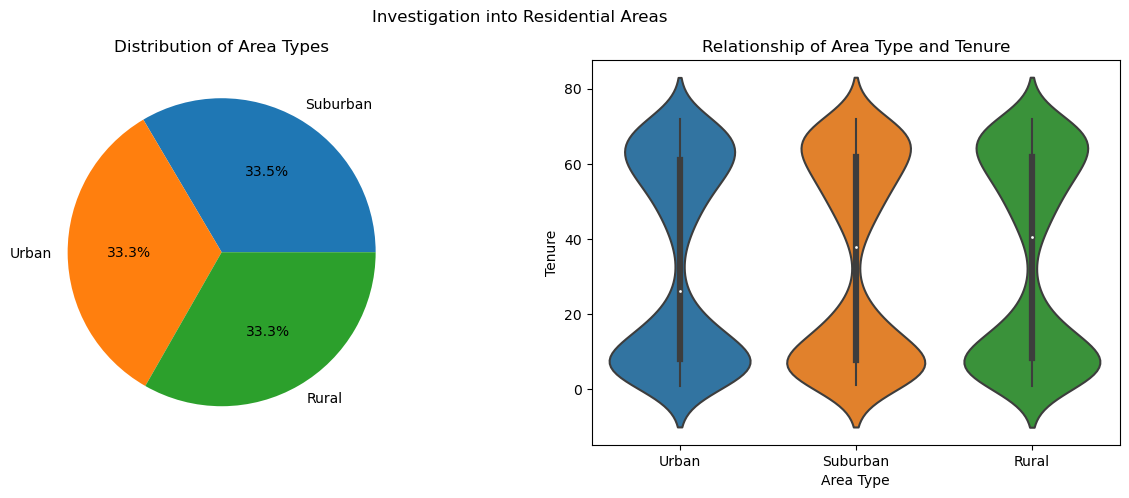

In [27]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Residential Areas")
plt.subplot(1,2,1)
plt.title("Distribution of Area Types")
area_type = data["Area"].value_counts()
plt.pie(area_type, labels=area_type.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Area Type and Tenure")
sns.violinplot(data = data, x="Area", y="Tenure",)
plt.xlabel("Area Type")
plt.ylabel("Tenure")

/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0, 0.5, 'Tenure')

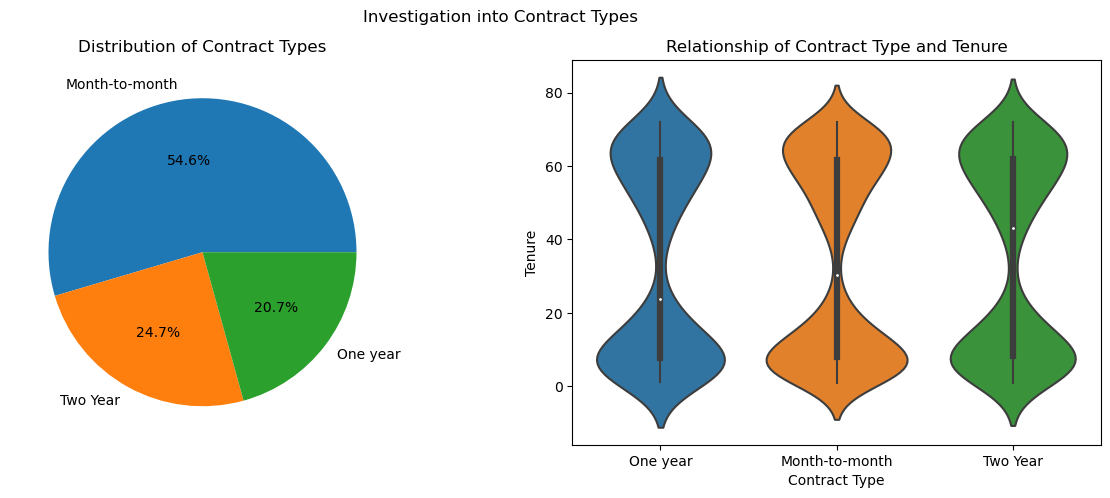

In [28]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Contract Types")
plt.subplot(1,2,1)
plt.title("Distribution of Contract Types")
contract_type = data["Contract"].value_counts()
plt.pie(contract_type, labels=contract_type.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Contract Type and Tenure")
sns.violinplot(data = data, x="Contract", y="Tenure",)
plt.xlabel("Contract Type")
plt.ylabel("Tenure")

/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0, 0.5, 'Tenure')

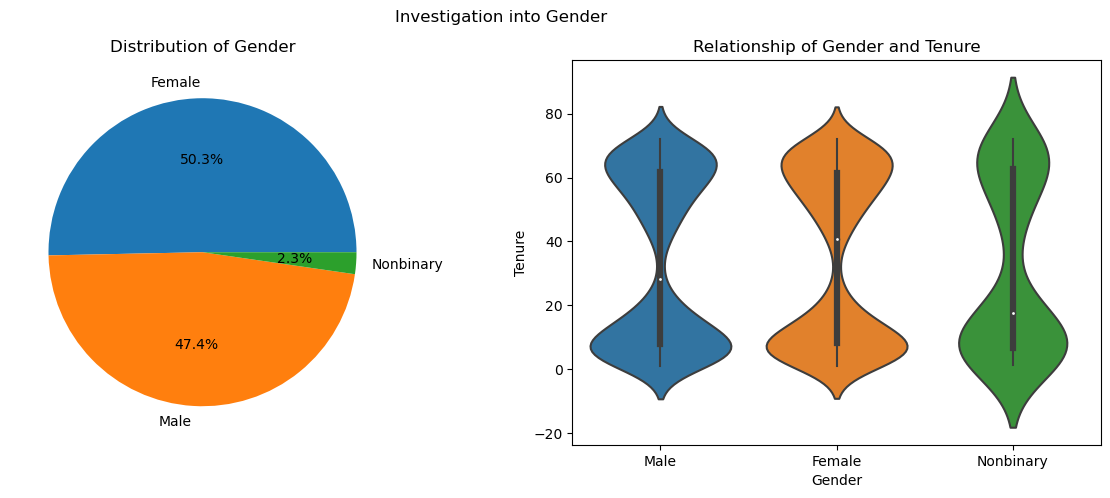

In [29]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Gender")
plt.subplot(1,2,1)
plt.title("Distribution of Gender")
client_gender = data["Gender"].value_counts()
plt.pie(client_gender, labels=client_gender.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Gender and Tenure")
sns.violinplot(data = data, x="Gender", y="Tenure",)
plt.xlabel("Gender")
plt.ylabel("Tenure")

/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


Text(0, 0.5, 'Tenure')

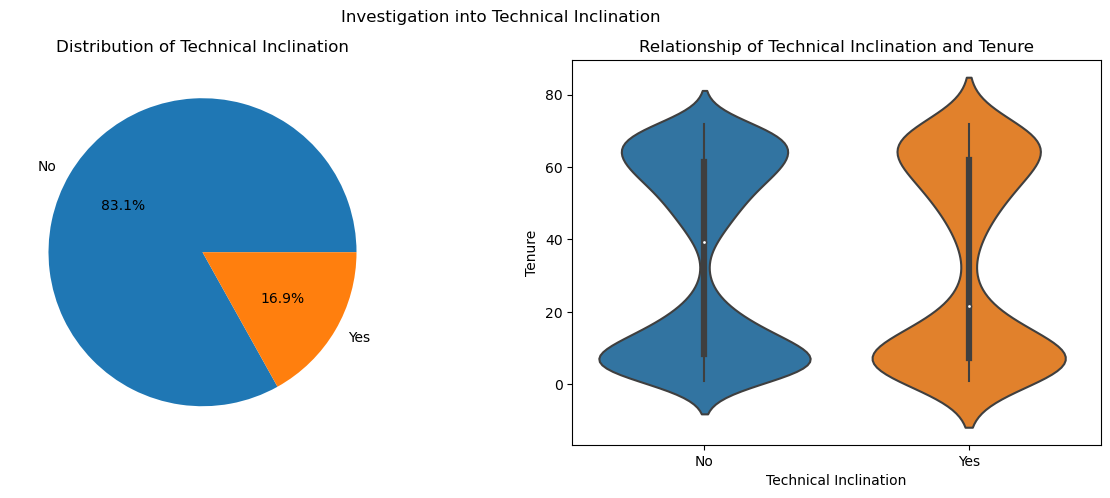

In [30]:
plt.figure(figsize=[15,5])
plt.suptitle("Investigation into Technical Inclination")
plt.subplot(1,2,1)
plt.title("Distribution of Technical Inclination")
client_tech = data["Techie"].value_counts()
plt.pie(client_tech, labels=client_tech.index, autopct='%1.1f%%')
plt.subplot(1,2,2)
plt.title("Relationship of Technical Inclination and Tenure")
sns.violinplot(data = data, x="Techie", y="Tenure",)
plt.xlabel("Technical Inclination")
plt.ylabel("Tenure")

##### 4: Data transformation goals
For this data, there was only one column that required data transformation: the Techie column. As this data only contains 2 possible values, it would be more efficient to store it as a boolean data type. This helps prevent invalid entries in the future, makes querying the data easier, and reduces the memory requirements of the program, as booleans require less memory than a string. No other columns require data transformation, as all categorical data types contain more than 2 possible entries, thus making the simplest data storage method being a string, and no quantitative data requires a log transormation. To perform the data transformation, I am going to set "No" in the Techie column to be False, and "Yes" to be True.

In [31]:
data["Techie"] = data["Techie"].apply(lambda x: 0 if x == "Yes" else 1)
data['Area'] = data['Area'].astype("category")
data['Marital'] = data.Marital.astype('category')
data.Gender = data.Gender.astype('category')
data.Contract = data.Contract.astype('category')
data.PaymentMethod = data.PaymentMethod.astype('category')
Genders_Converted = pd.get_dummies(data=data["Gender"], dtype=int)
Areas_Converted = pd.get_dummies(data=data["Area"], dtype=int)
Marital_Converted = pd.get_dummies(data=data["Marital"], dtype=int)
Contract_Converted = pd.get_dummies(data=data["Contract"], dtype=int)
Payment_Converted = pd.get_dummies(data=data["PaymentMethod"], dtype=int)
data.insert(0, "Male", Genders_Converted.Male)
data.insert(1, "Female", Genders_Converted.Female)
data.insert(2, "Nonbinary", Genders_Converted.Nonbinary)
data.insert(3, "Urban", Areas_Converted.Urban)
data.insert(4, "Suburban", Areas_Converted.Suburban)
data.insert(5, "Rural", Areas_Converted.Rural)
data.insert(6, "Divorced", Marital_Converted.Divorced)
data.insert(7, "Widowed", Marital_Converted.Widowed)
data.insert(8, "Separated", Marital_Converted.Separated)
data.insert(9, "Never_Married", Marital_Converted["Never Married"])
data.insert(10, "Married", Marital_Converted.Married)
data.insert(11, "YearContract", Contract_Converted["One year"])
data.insert(12, "TwoYearContract", Contract_Converted["Two Year"])
data.insert(13, "Month_to_Month", Contract_Converted["Month-to-month"])
data.insert(14, "Credit_Automatic", Payment_Converted["Credit Card (automatic)"])
data.insert(15, "Bank_Automatic", Payment_Converted["Bank Transfer(automatic)"])
data.insert(16, "Check", Payment_Converted["Mailed Check"])
data.insert(14, "E-check", Payment_Converted["Electronic Check"])
data = data.drop(['Area', 'Marital', 'Gender', 'Contract', 'PaymentMethod'], axis=1)

print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Male                7584 non-null   int64  
 1   Female              7584 non-null   int64  
 2   Nonbinary           7584 non-null   int64  
 3   Urban               7584 non-null   int64  
 4   Suburban            7584 non-null   int64  
 5   Rural               7584 non-null   int64  
 6   Divorced            7584 non-null   int64  
 7   Widowed             7584 non-null   int64  
 8   Separated           7584 non-null   int64  
 9   Never_Married       7584 non-null   int64  
 10  Married             7584 non-null   int64  
 11  YearContract        7584 non-null   int64  
 12  TwoYearContract     7584 non-null   int64  
 13  Month_to_Month      7584 non-null   int64  
 14  E-check             7584 non-null   int64  
 15  Credit_Automatic    7584 non-null   int64  
 16  Bank_Automa

##### 5: CSV Export
See attached csv for the cleaned and transformed data

In [32]:
data.to_csv('./D208CleanedData')

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7584 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Male                7584 non-null   int64  
 1   Female              7584 non-null   int64  
 2   Nonbinary           7584 non-null   int64  
 3   Urban               7584 non-null   int64  
 4   Suburban            7584 non-null   int64  
 5   Rural               7584 non-null   int64  
 6   Divorced            7584 non-null   int64  
 7   Widowed             7584 non-null   int64  
 8   Separated           7584 non-null   int64  
 9   Never_Married       7584 non-null   int64  
 10  Married             7584 non-null   int64  
 11  YearContract        7584 non-null   int64  
 12  TwoYearContract     7584 non-null   int64  
 13  Month_to_Month      7584 non-null   int64  
 14  E-check             7584 non-null   int64  
 15  Credit_Automatic    7584 non-null   int64  
 16  Bank_Automa

<h4>D: Initial and Reduced Linear Regression Model</h4>
<h5>1: Initial Multiple Linear Regression Model</h5>

In [34]:
y = data.Tenure
x = data[['Male', 'Female', 'Nonbinary', 'Urban', 'Suburban', 'Rural', 'Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married', 'YearContract', 'TwoYearContract', 'Month_to_Month', 'E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.943e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                -19044.
No. Observations:                7584   AIC:                         3.813e+04
Df Residuals:                    7563   BIC:                         3.828e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Male                  -0.9423      0

In [35]:
results.resid.std(ddof=x.shape[1])

2.9859508212310906

##### 2: Justifying a Statistically Based Feature Selection Procedure
We can see with the above model there is a warning indicating a possible multicollinearity problem. As previously establish, multicolinearity can cause issues, so a reduction in the features is justified, using the Variance Inflation Factor (VIF) as a metric to determine the number of independent variables to remove. Any factors with a VIF score greater than 10 would be removed from consideration due to multicolinearity

In [36]:
x = data[['Male', 'Female', 'Nonbinary', 'Urban', 'Suburban', 'Rural', 'Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married', 'YearContract', 'TwoYearContract', 'Month_to_Month', 'E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']]
vif = pd.DataFrame()
vif["Factor"] = x.columns
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif)

                Factor       vif
0                 Male       inf
1               Female       inf
2            Nonbinary       inf
3                Urban       inf
4             Suburban       inf
5                Rural       inf
6             Divorced       inf
7              Widowed       inf
8            Separated       inf
9        Never_Married       inf
10             Married       inf
11        YearContract       inf
12     TwoYearContract       inf
13      Month_to_Month       inf
14             E-check       inf
15    Credit_Automatic       inf
16      Bank_Automatic       inf
17               Check       inf
18              Techie  1.003046
19            Children  1.002680
20                 Age  1.003713
21              Income  1.002798
22  Outage_sec_perweek  1.003839
23       MonthlyCharge  1.005334
24   Bandwidth_GB_Year  1.005649


/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide


The VIF unfortunately revealed no variables to exclude from the model. This means that the most likely cause of the colinearity error is the categorical data, which return the inf values in the VIF. As such, the categorical variables will need to be removed. This will be done after the data for the numerical columns is normalized based on the maximum and minimum values, as this will allow for better analysis of the data.

In [37]:
x = data[['Male', 'Female', 'Nonbinary', 'Urban', 'Suburban', 'Rural', 'Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married', 'YearContract', 'TwoYearContract', 'Month_to_Month', 'E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year', 'Tenure']]

reg_df_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(x), columns=x.columns)
reg_df_minmax

/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
/home/edwinp/.conda/envs/D207/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: i

,Male,Female,Nonbinary,Urban,Suburban,Rural,Divorced,Widowed,Separated,Never_Married,Married,YearContract,TwoYearContract,Month_to_Month,E-check,Credit_Automatic,Bank_Automatic,Check,Techie,Children,Age,Income,Outage_sec_perweek,MonthlyCharge,Bandwidth_GB_Year,Tenure
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000,0.704225,0.228122,0.385924,0.404645,0.105176,0.081384
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.125,0.126761,0.172677,0.596054,0.759602,0.090361,0.001936
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.500,0.450704,0.074880,0.542613,0.341379,0.269731,0.207606
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.125,0.422535,0.150203,0.777590,0.139105,0.285451,0.226389
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.000,0.915493,0.321205,0.395473,0.290802,0.014607,0.009182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7579,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.375,0.070423,0.447741,0.467113,0.341540,0.907329,0.946501
7580,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.500,0.422535,0.273137,0.316020,0.581805,0.790684,0.845666
7581,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.125,0.422535,0.368985,0.307570,0.392094,0.570836,0.653718
7582,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.125,0.295775,0.131948,0.617109,0.810140,0.901207,0.987339


As the data is now normalized, the process of removing a number of variables will begin through Backwards Stepwise Elimination. This is a process that finds the highest alpha over a threshold (I am using a 0.05 value) and removing it from the analysis. Then, the process is repeated without that removed value until no more variables are above the threshold. Any variables that come from the same source (i.e. Male, Female, and Nonbinary all coming from Gender) will be removed simultaneously if any are to be removed

In [38]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Male', 'Female', 'Nonbinary', 'Urban', 'Suburban', 'Rural', 'Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married', 'YearContract', 'TwoYearContract', 'Month_to_Month', 'E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'Outage_sec_perweek', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 2.943e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13281.
No. Observations:                7584   AIC:                        -2.652e+04
Df Residuals:                    7563   BIC:                        -2.637e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Male                2.231e+09   9.59

In [39]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Male', 'Female', 'Nonbinary', 'Urban', 'Suburban', 'Rural', 'Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married', 'YearContract', 'TwoYearContract', 'Month_to_Month', 'E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.098e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13281.
No. Observations:                7584   AIC:                        -2.652e+04
Df Residuals:                    7564   BIC:                        -2.638e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Male               2.206e+09   9.54e+0

In [40]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Urban', 'Suburban', 'Rural', 'Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married', 'YearContract', 'TwoYearContract', 'Month_to_Month', 'E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.378e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13188.
No. Observations:                7584   AIC:                        -2.634e+04
Df Residuals:                    7566   BIC:                        -2.622e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Urban              1.972e+08   1.36e+1

In [41]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married', 'YearContract', 'TwoYearContract', 'Month_to_Month', 'E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 3.830e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13188.
No. Observations:                7584   AIC:                        -2.634e+04
Df Residuals:                    7568   BIC:                        -2.623e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Divorced           2.789e+10   4.83e+1

In [42]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married','E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check','Techie',  'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.415e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13184.
No. Observations:                7584   AIC:                        -2.634e+04
Df Residuals:                    7570   BIC:                        -2.624e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Divorced            6.61e+10   5.77e+1

In [43]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married','E-check', 'Credit_Automatic', 'Bank_Automatic', 'Check',  'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 4.786e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13186.
No. Observations:                7584   AIC:                        -2.635e+04
Df Residuals:                    7571   BIC:                        -2.626e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Divorced           2.324e+10   5.04e+1

In [44]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Divorced', 'Widowed', 'Separated', 'Never_Married', 'Married',  'Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 5.744e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13185.
No. Observations:                7584   AIC:                        -2.635e+04
Df Residuals:                    7573   BIC:                        -2.627e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Divorced            2.89e+10   4.77e+1

In [45]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Children', 'Age', 'Income', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.149e+05
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13184.
No. Observations:                7584   AIC:                        -2.636e+04
Df Residuals:                    7578   BIC:                        -2.631e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.0414      0.00

In [46]:
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Children', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.436e+05
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13182.
No. Observations:                7584   AIC:                        -2.635e+04
Df Residuals:                    7579   BIC:                        -2.632e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.0415      0.00

In [47]:
results.resid.std(ddof=x.shape[1])

0.04256273189457669

This last model is our final model for the linear regression, as all p-values have fallen to 0, beneath the threshold of 0.05.This model is significantly improved, as can be seen from the change is residual standard error, with the initial having 2.98, whereas the final model has a residual standard error of 0.04.
##### 3: Reduced Linear Regression Model
A large number of our variables were removed. The variables were as follows:
<ul>
    <li>Gender</li>
    <li>Area</li>
    <li>Contract</li>
    <li>Payment Method</li>
    <li>Marital</li>
    <li>Outage_sec_perweek</li>
    <li>Techie</li>
    <li>Income</li>
</ul>
The remaining independent variables are as follows:
<ul>
    <li>Children</li>
    <li>Age</li>
    <li>MonthlyCharge</li>
    <li>Bandwidth_GB_Year</li>
</ul>
All of these influence the only dependent variable of Tenure

In [48]:
reg_df_minmax = reg_df_minmax[['Tenure', 'Age', 'MonthlyCharge', 'Children', 'Bandwidth_GB_Year']]
y = reg_df_minmax.Tenure
x=reg_df_minmax[['Children', 'Age', 'MonthlyCharge', 'Bandwidth_GB_Year']].assign(const=1)
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Tenure   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                 1.436e+05
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:11:33   Log-Likelihood:                 13182.
No. Observations:                7584   AIC:                        -2.635e+04
Df Residuals:                    7579   BIC:                        -2.632e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Children             -0.0415      0.00

###### <a id="E"></a>
#### E: Analyzing Dataset
##### 1: Explanation of Data Analysis Procedure
The initial multiple linear regression model had a large number of variables, the majority of which having no value to the model itself. After the variables with p-values above 0.05 were removed, the model reduced the overall number of dependent in it from 26 to 4. With every variable being statistically significant, the model should be much more reliable in the reduced state.
We see the extent of the improvement by comparing the values of residual standard error. With the initial model, we get a startlingly large 2.98, as opposed to the fairly small 0.04 in the reduced model.

##### 2: Output and Calculations

<Axes: xlabel='Children', ylabel='Tenure'>

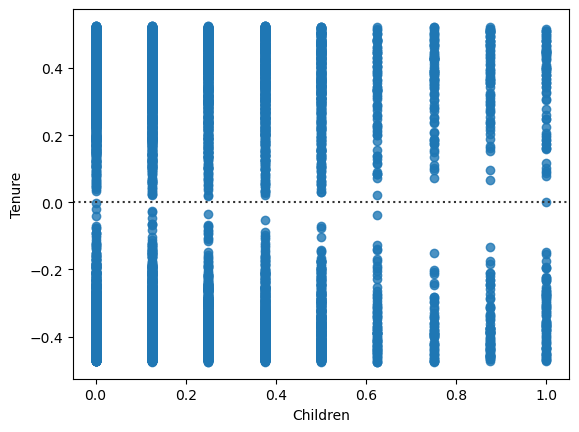

In [56]:
sns.residplot(x='Children', y="Tenure", data=reg_df_minmax)

<Axes: xlabel='Age', ylabel='Tenure'>

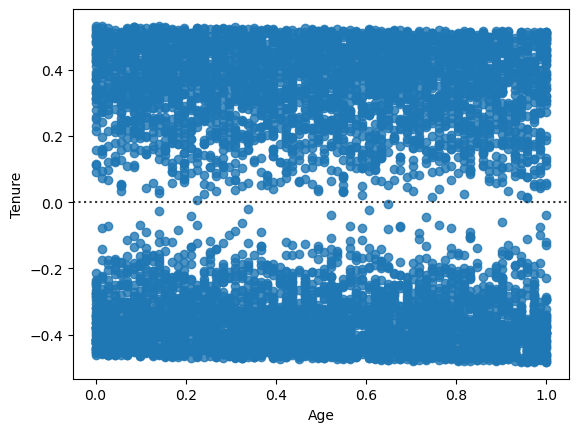

In [57]:
sns.residplot(x='Age', y="Tenure", data=reg_df_minmax)

<Axes: xlabel='MonthlyCharge', ylabel='Tenure'>

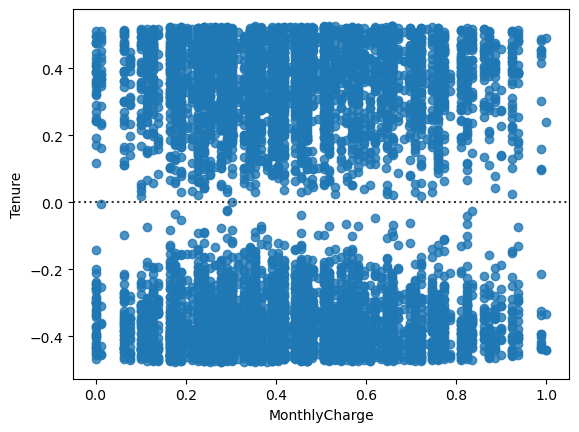

In [58]:
sns.residplot(x='MonthlyCharge', y="Tenure", data=reg_df_minmax)

<Axes: xlabel='Bandwidth_GB_Year', ylabel='Tenure'>

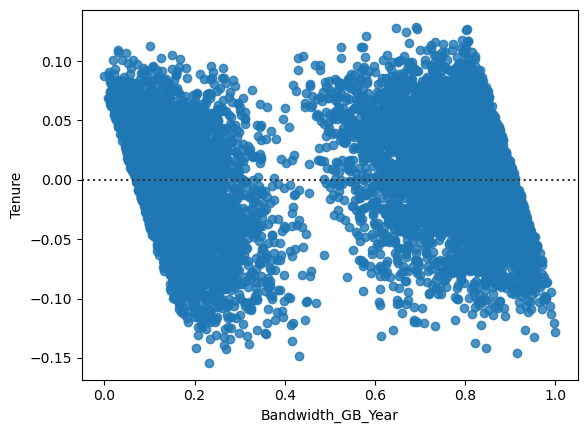

In [59]:
sns.residplot(x='Bandwidth_GB_Year', y="Tenure", data=reg_df_minmax)

In most of the above plots, the residuals don't seem centered upon 0 or the line of best fit. The best fit is aroud Bandwidth_GB_Year, which has most entries fall between 0.1 and -0.15. Compared to the other values, which largely fall between 0.5 and -0.5, Bandwidth_GB_Year is a significant improvement. Therefore, the most reliable metric to determine the tenure of customers is Bandwidth_GB_Year.
##### 3: Copy of the Code
A copy of the code can be found below, split into multiple cells to show the graphics, but devoid of any markdown cells found above.

<a id="F"></a>
#### F: Summarizing Findings
##### 1: Results of Analysis

##### 2: Recommended Course of Action
Though most of the variables showed weak or no correlation with the length of customer tenure, the exception is the variable Bandwidth_GB_Year. Therefore, those customers who habitually use higher amounts of bandwidth per year have a tendency to remain with the company for a longer length of time. As such, the recommended course of action going forward would be to appeal to customers of these sorts with promotions and advertisements going forward, as Bandwidth_GB_Year is positively correlated with tenure, resulting in longer term customers and less concerns about losing customers going forward.

<a id="G"></a>
#### G: Panopto Video
A Panopto video recording of my code in action can be found at the following link:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=f5ce091c-2916-48a6-9fd7-b12200269a64

<a id="H"></a>
#### H: Code References
<a src=https://www.w3resource.com/python-exercises/pandas/missing-values/python-pandas-missing-values-exercise-14.php>Pandas information</a> used for cleaning the data and excluding outliers

<a id="I"></a>
#### H: Source References
<a src="https://search.ebscohost.com/login.aspx?direct=true&db=nlebk&AN=2091371&site=eds-live&scope=site&authtype=sso&custid=ns017578&ebv=EB&ppid=pp_9">Chantal D. Larose, Daniel T. Larose: Data Science Using Python and R</a> used to get an understanding of Exploratory Data Analysis and the usage of visualizations